In [75]:
#Imports
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
dado = pd.read_csv("graph.csv")

In [76]:
dado.head()

,vertice,adjacente,peso,color
0,Elthon,Computação-Administração-Medicina,100-37-40,green
1,Patrick,Computação-Administração,60-10,green
2,Zezinha,Medicina,40,green
3,Computação,NaN,NaN,red
4,Administração,Elthon,55,red


In [77]:
#Criando grafo e adicionando vertices
graph = nx.Graph()
graph.add_nodes_from(dado.vertice)

In [78]:
for i in range(len(dado.vertice.values)):
    if pd.isnull(dado.adjacente[i]) == False:
        edges = dado.adjacente[i].split("-")
        pesos = dado.peso[i].split("-")
        for j in range(len(edges)):
            print(dado.vertice[i],edges[j],pesos[j])
            graph.add_weighted_edges_from([(dado.vertice[i],edges[j],pesos[j])]) #Arestas com pesos


Elthon Computação 100
Elthon Administração 37
Elthon Medicina 40
Patrick Computação 60
Patrick Administração 10
Zezinha Medicina 40
Administração Elthon 55


In [79]:
#graph["X"]

In [80]:
edges = graph.edges
weights = [graph[u][v]['weight'] for u,v in edges]

In [81]:
for i in range(len(weights)):
    weights[i] = int(weights[i])
print(weights)
weights_f = [*map(lambda el: el / max(weights) * 10, weights)]
print(weights_f)


[100, 55, 40, 60, 10, 40]
[10.0, 5.5, 4.0, 6.0, 1.0, 4.0]


In [82]:
edges= []
for i in graph.edges:
    edges.append(i)

In [83]:
edge_labels = {}
for i in range(len(edges)):
    edge_labels[edges[i]] = weights[i]
weights

[100, 55, 40, 60, 10, 40]

In [84]:
weights_node = []
for i in range(len(dado.peso.values)):
    if pd.isnull(dado.adjacente[i]) == False:
        aux = dado.peso[i].split("-")
        for i in range(len(aux)):
            aux[i] = int(aux[i])
        weights_node.append(sum(aux))
    else:
        weights_node.append(1)
print(weights_node)

[177, 70, 40, 1, 55, 1, 1]


In [85]:
weights_node = [*map(lambda el: el / max(weights_node) * 1e4, weights_node)]

{('Elthon',
  'Computação'): Text(0.04951559945049633, 0.21694191097510088, '100'),
 ('Elthon',
  'Administração'): Text(0.04951559945049633, -0.2169418641428812, '55'),
 ('Elthon', 'Medicina'): Text(0.3887395120840538, -0.48746393014369865, '40'),
 ('Patrick',
  'Computação'): Text(-0.1387394971828929, 0.6078576524464321, '60'),
 ('Patrick',
  'Administração'): Text(-0.1387394971828929, 0.17397387732845007, '10'),
 ('Zezinha',
  'Medicina'): Text(-0.2225209460295708, 8.514949079163614e-09, '40')}

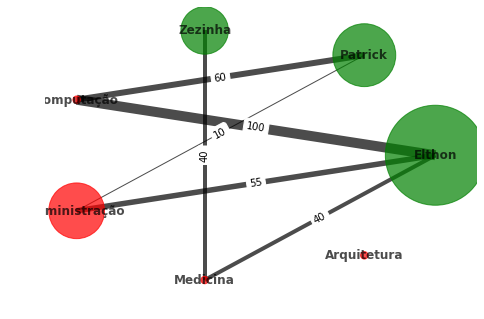

In [86]:
pos = nx.circular_layout(graph)
nx.draw(graph,
        pos,
        node_color=dado.color.values,
        node_size=weights_node,
        with_labels=True,alpha = 0.7,
        font_weight='bold',
        width=weights_f)

edge_labels = nx.get_edge_attributes(graph,'weight')
nx.draw_networkx_edge_labels(graph, pos, edge_labels = edge_labels)

In [87]:
graph.adj["A"]

KeyError: 'A'